# FEATURE ENGINEERING - PROJECT1

## Import required libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

from sklearn.model_selection import train_test_split 

from scipy.stats import chi2_contingency 

from math import sqrt

%matplotlib inline

(A)	COLLECT / EXTRACT DATA
THE FIRST STEP IN BUILDING A MODEL IS TO COLLECT OR EXTRACT DATA ON THE DEPENDENT VARIABLE AND INDEPENDENT VARIABLES FROM DIFFERENT DATASETS PROVIDED. DATA COLLECTION / EXTRACTION IS TIME CONSUMING AND EXPENSIVE PROCESS.

1.	YOU AS TEAM OF THREE OR FOUR STUDENTS YOU HAVE MERGE THE CANDIDATE DATA PROVIDED BASED ON THE COMMON FACTORS. 
2.	SIMULTANESUOYLY YOU NEED TO MAKE SEARCH WHAT ARE THE ATTRIBUTES THOSE ARE TAKEN INTO CONSIDERATION WHILE CARRYING OUT RECRUITMENT ACTIVITY. 
3.	THE RESEARCH WILL PROVIDE YOU MORE INSIGHT ON DETERMINING THE USEFUL ATTRIBUTES PRESENT IN THE DATASET OR GIVE POINTERS TO THE VARIBLES THAT NEEDS TO BE DERVIED. MAKE LIST OF SUCH POTENTIAL ATTRIBTUES. 
4.	OUTCOME OF THIS STEP WILL BE MERGED DATA SET CONTAINING THE 200 CANDIDATES DATA. 
5.	DOCUMENT ALL YOUR EFFORTS APPROPRIATELY IN THE JUPYTER NOTEBOOKS WITH DESCRIPTION AND CODE. 

## Read Data to a Pandas DataFrame

##### Load Application Data

In [164]:
application_data_df = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Application data')

In [165]:
application_data_df.head()

,Candidate ID,Date of Application,Date of Interview,Date of Job Offer,Date of Offer extension,Date of Joining,Offered band,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,LOB,Joining location,Candidate relocation status,Acceptance status
0,C1,2019-08-28,2020-06-12,2020-06-22,2020-06-29,2020-07-14,B2,1.383755e+06,0.190383,58122.28125,IT,NCR,Yes,Joined
1,C2,2019-11-28,2020-06-08,2020-06-18,2020-06-25,2020-07-10,B4,2.976590e+06,0.332342,111705.13125,Manufacturing,NCR,Yes,Offer Rejected
2,C3,2019-08-11,2020-05-26,2020-06-05,2020-06-12,2020-07-12,B0,7.416631e+05,0.271345,29168.43750,IT,Chennai,No,Joined
3,C4,2019-08-18,2020-05-15,2020-05-25,2020-06-01,2020-07-31,C6,4.079724e+06,0.273813,160138.23750,Finance,Hyderabad,No,Offer Rejected
4,C5,2019-09-06,2020-01-25,2020-02-04,2020-02-11,2020-02-26,B5,3.340936e+06,0.289619,129531.88125,IT,Mumbai,Yes,Joined


##### Load Candidate Data

In [166]:
candidate_data_df = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Candidate Data')

In [167]:
candidate_data_df.head()

,Candidate ID,Notice period,Current CTC,Current gross salary,Current organization,Highest Educational Degree,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Gender,Candidate source,DOB,Location,Number of precious jobs
0,C1,0,1162445.625,1033285,IBM,Diploma,8,7.2,2012,1500000,0.290383,M,Direct,1991-11-06,Kolkata,2
1,C2,0,2234102.625,1985869,Mahindra,Diploma,15,13.5,2005,3200000,0.432342,M,Agency,1984-02-22,Pune,4
2,C3,30,583368.750,518550,Infosys,Diploma,4,3.6,2016,800000,0.371345,M,Direct,1995-03-27,Chennai,1
3,C4,60,3202764.750,2846902,JP Morgun,Diploma,20,18.0,2000,4400000,0.373813,M,Direct,1979-06-14,Hyderabad,6
4,C5,15,2590637.625,2302789,HCL,Diploma,17,15.3,2003,3600000,0.389619,M,Employee referral,1982-11-26,Hyderabad,5


##### Load Interview Data

In [168]:
interview_data_df = pd.read_excel('HR-Records_Final.xlsx', sheet_name='Interview Data ')

In [169]:
interview_data_df.head()

,Candidate ID,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,Interview types,Interview Types2,First interview duration,Last interaction duration
0,C1,2020-05-29,4,2020-06-03,2020-06-12,General,Online,40,25
1,C2,2020-05-31,2,2020-06-05,2020-06-08,Managerial,FaceToFace,40,40
2,C3,2020-05-15,3,2020-05-20,2020-05-26,Technical,Online,45,60
3,C4,2020-05-10,1,2020-05-15,2020-05-15,Technical,Written,40,40
4,C5,2020-01-11,4,2020-01-16,2020-01-25,Technical,Online,15,25


##### Merge Application, Candidate and Interview Data by Candidate ID

In [170]:
master_data = application_data_df.merge(candidate_data_df, on='Candidate ID').merge(interview_data_df, on='Candidate ID')


In [171]:
master_data.shape

(200, 37)

In [172]:
master_data.head().T

,0,1,2,3,4
Candidate ID,C1,C2,C3,C4,C5
Date of Application,2019-08-28 00:00:00,2019-11-28 00:00:00,2019-08-11 00:00:00,2019-08-18 00:00:00,2019-09-06 00:00:00
Date of Interview,2020-06-12 00:00:00,2020-06-08 00:00:00,2020-05-26 00:00:00,2020-05-15 00:00:00,2020-01-25 00:00:00
Date of Job Offer,2020-06-22 00:00:00,2020-06-18 00:00:00,2020-06-05 00:00:00,2020-05-25 00:00:00,2020-02-04 00:00:00
Date of Offer extension,2020-06-29 00:00:00,2020-06-25 00:00:00,2020-06-12 00:00:00,2020-06-01 00:00:00,2020-02-11 00:00:00
Date of Joining,2020-07-14 00:00:00,2020-07-10 00:00:00,2020-07-12 00:00:00,2020-07-31 00:00:00,2020-02-26 00:00:00
Offered band,B2,B4,B0,C6,B5
Offered Salary,1.38376e+06,2.97659e+06,741663,4.07972e+06,3.34094e+06
Percentage hike offered (CTC),0.190383,0.332342,0.271345,0.273813,0.289619
Joining bonus amount,58122.3,111705,29168.4,160138,129532


### Drop columns

Based on the domain analysis dropping the below columns as they are not considered to be significant in the prediction:
1. Candidate ID
2. Date of Application
3. Date of Interview
4. Current gross salary
5. Year of graduation
6. DOB
7. Written Test Date
8. Date of first Interview

In [173]:
#Drop columns from the dataframe
data = master_data.drop(["Candidate ID", "Date of Application", "Date of Interview", "Current gross salary", "Year of graduation","DOB","Written Test Date","Date of first Interview"], axis=1)


## Get dimensionality of the data

In [174]:
print("Number of Records : {} \nNumber of variables : {}".format(data.shape[0], data.shape[1]))

Number of Records : 200 
Number of variables : 29


## Observe the data

In [175]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Date of Job Offer,2020-06-22 00:00:00,2020-06-18 00:00:00,2020-06-05 00:00:00,2020-05-25 00:00:00,2020-02-04 00:00:00,2020-03-08 00:00:00,2020-05-09 00:00:00,2020-04-10 00:00:00,2020-07-06 00:00:00,2020-04-14 00:00:00,...,2020-01-19 00:00:00,2020-03-07 00:00:00,2020-07-08 00:00:00,2020-02-02 00:00:00,2020-03-16 00:00:00,2020-06-18 00:00:00,2020-07-04 00:00:00,2020-02-10 00:00:00,2020-05-12 00:00:00,2020-02-08 00:00:00
Date of Offer extension,2020-06-29 00:00:00,2020-06-25 00:00:00,2020-06-12 00:00:00,2020-06-01 00:00:00,2020-02-11 00:00:00,2020-03-15 00:00:00,2020-05-16 00:00:00,2020-04-17 00:00:00,2020-07-13 00:00:00,2020-04-21 00:00:00,...,2020-01-26 00:00:00,2020-03-14 00:00:00,2020-07-15 00:00:00,2020-02-09 00:00:00,2020-03-23 00:00:00,2020-06-25 00:00:00,2020-07-11 00:00:00,2020-02-17 00:00:00,2020-05-19 00:00:00,2020-02-15 00:00:00
Date of Joining,2020-07-14 00:00:00,2020-07-10 00:00:00,2020-07-12 00:00:00,2020-07-31 00:00:00,2020-02-26 00:00:00,2020-04-14 00:00:00,2020-06-30 00:00:00,2020-06-16 00:00:00,2020-08-12 00:00:00,2020-05-06 00:00:00,...,2020-03-11 00:00:00,2020-05-13 00:00:00,2020-08-29 00:00:00,2020-02-24 00:00:00,2020-04-22 00:00:00,2020-08-09 00:00:00,2020-08-25 00:00:00,2020-03-03 00:00:00,2020-07-18 00:00:00,2020-04-15 00:00:00
Offered band,B2,B4,B0,C6,B5,C6,B3,B0,B5,B4,...,B5,B3,B4,C6,B1,B5,B5,B4,B4,B0
Offered Salary,1.38376e+06,2.97659e+06,741663,4.07972e+06,3.34094e+06,4.37329e+06,2.70625e+06,556952,2.66841e+06,2.68362e+06,...,2.96745e+06,2.70565e+06,2.67381e+06,3.8102e+06,1.0192e+06,3.63256e+06,2.95136e+06,2.39268e+06,2.80392e+06,740156
Percentage hike offered (CTC),0.190383,0.332342,0.271345,0.273813,0.289619,0.338593,0.39679,0.293796,0.152236,0.240235,...,0.276019,0.392128,0.182117,0.31476,0.261343,0.358273,0.186976,0.154088,0.43002,0.236813
Joining bonus amount,58122.3,111705,29168.4,160138,129532,163354,96874,21524,115793,108190,...,116277,97176.7,113094,144901,40401.3,133720,124322,103661,98038,29921.9
LOB,IT,Manufacturing,IT,Finance,IT,Finance,IT,IT,Manufacturing,IT,...,IT,IT,IT,IT,IT,IT,Finance,IT,Finance,Finance
Joining location,NCR,NCR,Chennai,Hyderabad,Mumbai,Mumbai,Chennai,Mumbai,Pune,Pune,...,Mumbai,Chennai,Pune,Chennai,Hyderabad,Chennai,NCR,Hyderabad,Pune,Chennai
Candidate relocation status,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


### Identify data types

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date of Job Offer                200 non-null    datetime64[ns]
 1   Date of Offer extension          200 non-null    datetime64[ns]
 2   Date of Joining                  200 non-null    datetime64[ns]
 3   Offered band                     200 non-null    object        
 4   Offered Salary                   200 non-null    float64       
 5   Percentage hike offered (CTC)    200 non-null    float64       
 6   Joining bonus amount             200 non-null    float64       
 7   LOB                              200 non-null    object        
 8   Joining location                 200 non-null    object        
 9   Candidate relocation status      200 non-null    object        
 10  Acceptance status                200 non-null    object       

### Statistical Summary

In [177]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Offered Salary,200.0,2.346565e+06,1.095181e+06,460949.11250,1.396196e+06,2.414243e+06,3.317921e+06,4.568679e+06
Percentage hike offered (CTC),200.0,2.706716e-01,8.713134e-02,0.10994,1.940578e-01,2.755148e-01,3.400898e-01,4.917724e-01
Joining bonus amount,200.0,9.296728e+04,4.371861e+04,18048.88125,5.295534e+04,9.694949e+04,1.333756e+05,1.676222e+05
Notice period,200.0,3.127500e+01,2.203810e+01,0.00000,1.500000e+01,3.000000e+01,4.500000e+01,6.000000e+01
Current CTC,200.0,1.859346e+06,8.743721e+05,360977.62500,1.059107e+06,1.938990e+06,2.667512e+06,3.352445e+06
Total experience,200.0,1.228000e+01,5.242041e+00,3.00000,7.750000e+00,1.200000e+01,1.700000e+01,2.000000e+01
Relevant experience,200.0,1.105200e+01,4.717837e+00,2.70000,6.975000e+00,1.080000e+01,1.530000e+01,1.800000e+01
Expected CTC,200.0,2.532500e+06,1.181556e+06,500000.00000,1.500000e+06,2.600000e+06,3.600000e+06,4.900000e+06
Percentage hike (CTC) expected,200.0,3.706716e-01,8.713134e-02,0.20994,2.940578e-01,3.755148e-01,4.400898e-01,5.917724e-01
Number of precious jobs,200.0,3.575000e+00,1.728965e+00,1.00000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00


In [178]:
data.describe(include=["object"]).T 

,count,unique,top,freq
Offered band,200,7,C6,42
LOB,200,3,IT,120
Joining location,200,5,NCR,51
Candidate relocation status,200,2,Yes,185
Acceptance status,200,2,Joined,102
Current organization,200,15,Oracle,21
Highest Educational Degree,200,3,Bachelors,73
Gender,200,2,M,111
Candidate source,200,3,Employee referral,72
Location,200,10,Kolkata,26


### Check for null values in the data sets

In [179]:
data.isnull().sum()

Date of Job Offer                  0
Date of Offer extension            0
Date of Joining                    0
Offered band                       0
Offered Salary                     0
Percentage hike offered (CTC)      0
Joining bonus amount               0
LOB                                0
Joining location                   0
Candidate relocation status        0
Acceptance status                  0
Notice period                      0
Current CTC                        0
Current organization               0
Highest Educational Degree         0
Total experience                   0
Relevant experience                0
Expected CTC                       0
Percentage hike (CTC) expected     0
Gender                             0
Candidate source                   0
Location                           0
Number of precious jobs            0
Interview rounds                   0
Date of last Interview             0
Interview types                    0
Interview Types2                   0
F

### Check for duplicates

In [180]:
#identifying and removing duplicate values
duplicate_rows_df = data[data.duplicated()]
print( duplicate_rows_df.shape)
print( "No duplicate data")

(0, 29)
No duplicate data


### Derive new columns

In [181]:
#Field_1 = Date of Joining - Date of Job Offer. 
#Field_2 = Date of Offer extension - Date of Job Offer
#Derive new colum = Date of Job Offer - Date of last Interview
data["Time_taken_to_offer"] = (data["Date of Job Offer"] - data["Date of last Interview"]).dt.days
data["Time_to_join"] = (data["Date of Joining"] - data["Date of Job Offer"]).dt.days
data["Time_to_request_extension"] = (data["Date of Offer extension"] - data["Date of Job Offer"]).dt.days

data.head().T

,0,1,2,3,4
Date of Job Offer,2020-06-22 00:00:00,2020-06-18 00:00:00,2020-06-05 00:00:00,2020-05-25 00:00:00,2020-02-04 00:00:00
Date of Offer extension,2020-06-29 00:00:00,2020-06-25 00:00:00,2020-06-12 00:00:00,2020-06-01 00:00:00,2020-02-11 00:00:00
Date of Joining,2020-07-14 00:00:00,2020-07-10 00:00:00,2020-07-12 00:00:00,2020-07-31 00:00:00,2020-02-26 00:00:00
Offered band,B2,B4,B0,C6,B5
Offered Salary,1.38376e+06,2.97659e+06,741663,4.07972e+06,3.34094e+06
Percentage hike offered (CTC),0.190383,0.332342,0.271345,0.273813,0.289619
Joining bonus amount,58122.3,111705,29168.4,160138,129532
LOB,IT,Manufacturing,IT,Finance,IT
Joining location,NCR,NCR,Chennai,Hyderabad,Mumbai
Candidate relocation status,Yes,Yes,No,No,Yes


In [182]:
#As "Time_taken_to_offer" & "Time_to_request_extension" is constant for all the records in the dataset
#Dropping the derived columns
data = data.drop(["Time_taken_to_offer", "Time_to_request_extension"], axis=1)


In [183]:
#Dropping date columns
data = data.drop(["Date of Job Offer", "Date of Offer extension", "Date of Joining", "Date of last Interview"], axis=1)


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Offered band                     200 non-null    object 
 1   Offered Salary                   200 non-null    float64
 2   Percentage hike offered (CTC)    200 non-null    float64
 3   Joining bonus amount             200 non-null    float64
 4   LOB                              200 non-null    object 
 5   Joining location                 200 non-null    object 
 6   Candidate relocation status      200 non-null    object 
 7   Acceptance status                200 non-null    object 
 8   Notice period                    200 non-null    int64  
 9   Current CTC                      200 non-null    float64
 10  Current organization             200 non-null    object 
 11  Highest Educational Degree       200 non-null    object 
 12  Total experience      

### Data type conversion

In [185]:
#conved objects to string

data[['Offered band', 'LOB', 'Joining location','Candidate relocation status','Acceptance status','Current organization','Highest Educational Degree','Gender','Candidate source','Location','Interview types','Interview Types2']] = master_data[['Offered band', 'LOB', 'Joining location','Candidate relocation status','Acceptance status','Current organization','Highest Educational Degree','Gender','Candidate source','Location','Interview types','Interview Types2']].astype("string")

In [207]:
data.rename(columns={"Percentage hike offered (CTC)": "Percentage hike offered", "Percentage hike (CTC) expected ": "Percentage hike expected"}, inplace=True)


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Offered band                 200 non-null    string 
 1   Offered Salary               200 non-null    float64
 2   Percentage hike offered      200 non-null    float64
 3   Joining bonus amount         200 non-null    float64
 4   LOB                          200 non-null    string 
 5   Joining location             200 non-null    string 
 6   Candidate relocation status  200 non-null    string 
 7   Acceptance status            200 non-null    string 
 8   Notice period                200 non-null    int64  
 9   Current CTC                  200 non-null    float64
 10  Current organization         200 non-null    string 
 11  Highest Educational Degree   200 non-null    string 
 12  Total experience             200 non-null    int64  
 13  Relevant experience 

In [209]:
numericcolumn = ["Offered Salary","Percentage hike offered","Joining bonus amount","Notice period","Current CTC","Total experience","Relevant experience","Expected CTC","Percentage hike expected","Number of precious jobs","Interview rounds","First interview duration","Last interaction duration","Time_to_join"]
numericcolumn

['Offered Salary',
 'Percentage hike offered',
 'Joining bonus amount',
 'Notice period',
 'Current CTC',
 'Total experience',
 'Relevant experience',
 'Expected CTC',
 'Percentage hike expected',
 'Number of precious jobs',
 'Interview rounds',
 'First interview duration',
 'Last interaction duration',
 'Time_to_join']

In [210]:
crosscolumn = ["Offered band","LOB","Joining location","Candidate relocation status","Current organization","Highest Educational Degree","Gender","Candidate source","Location","Interview types","Interview Types2"]
crosscolumn

['Offered band',
 'LOB',
 'Joining location',
 'Candidate relocation status',
 'Current organization',
 'Highest Educational Degree',
 'Gender',
 'Candidate source',
 'Location',
 'Interview types',
 'Interview Types2']

### Dependent variable

In [187]:
#create a target coulmn as numeric
data['Target'] = data['Acceptance status'].astype('category').cat.codes

<AxesSubplot:xlabel='Acceptance status', ylabel='count'>

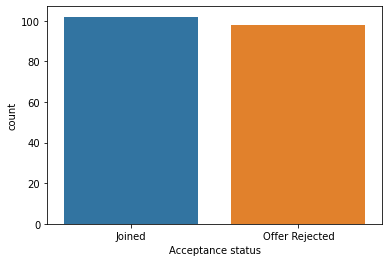

In [188]:
sns.countplot(x=data['Acceptance status'])

<AxesSubplot:xlabel='Target', ylabel='count'>

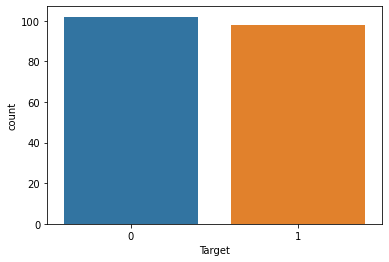

In [189]:
sns.countplot(x=data['Target'])

### Univariate Analaysis - Check on data distribution

array([[<AxesSubplot:title={'center':'Offered Salary'}>,
        <AxesSubplot:title={'center':'Percentage hike offered'}>,
        <AxesSubplot:title={'center':'Joining bonus amount'}>],
       [<AxesSubplot:title={'center':'Notice period'}>,
        <AxesSubplot:title={'center':'Current CTC'}>,
        <AxesSubplot:title={'center':'Total experience'}>],
       [<AxesSubplot:title={'center':'Relevant experience'}>,
        <AxesSubplot:title={'center':'Expected CTC'}>,
        <AxesSubplot:title={'center':'Percentage hike expected'}>],
       [<AxesSubplot:title={'center':'Number of precious jobs'}>,
        <AxesSubplot:title={'center':'Interview rounds'}>,
        <AxesSubplot:title={'center':'First interview duration'}>],
       [<AxesSubplot:title={'center':'Last interaction duration'}>,
        <AxesSubplot:title={'center':'Time_to_join'}>,
        <AxesSubplot:title={'center':'Target'}>]], dtype=object)

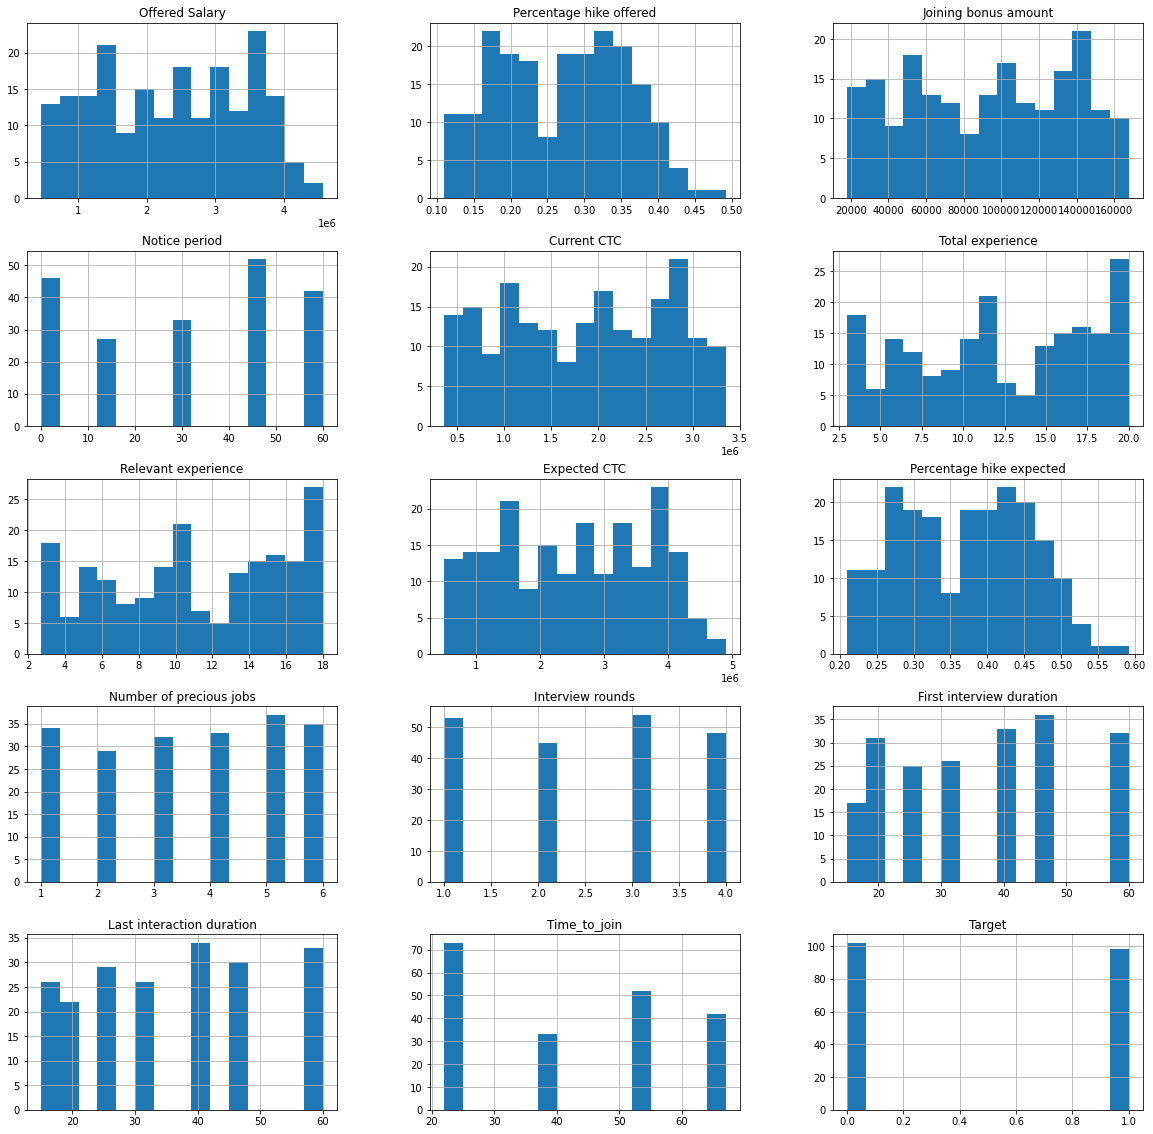

In [211]:
data.hist(layout=(5,3), bins=15, figsize=(20,20))

### Test for Outliers


 Box Plot for variable : Offered Salary


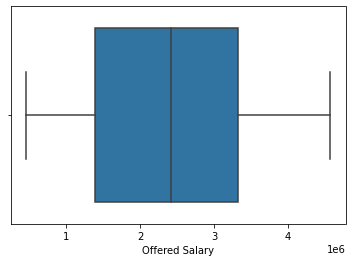


 Box Plot for variable : Percentage hike offered


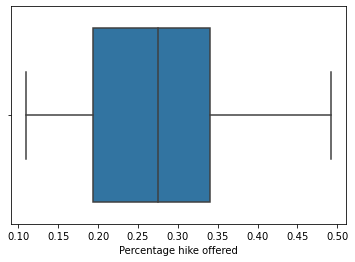


 Box Plot for variable : Joining bonus amount


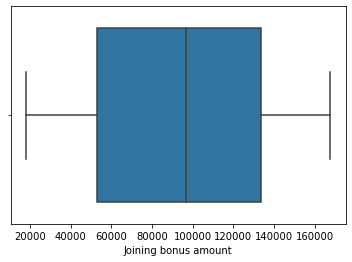


 Box Plot for variable : Notice period


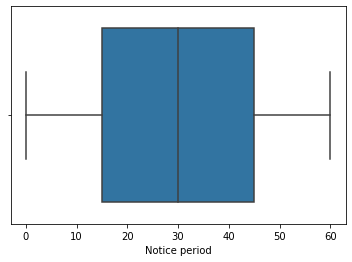


 Box Plot for variable : Current CTC


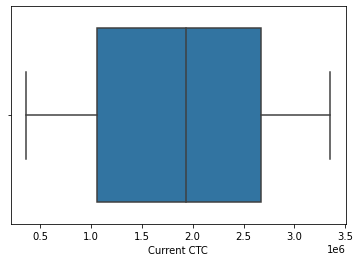


 Box Plot for variable : Total experience


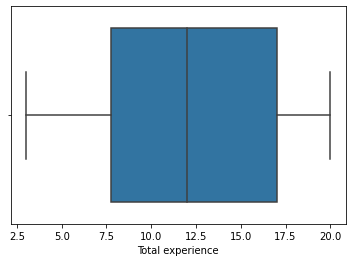


 Box Plot for variable : Relevant experience


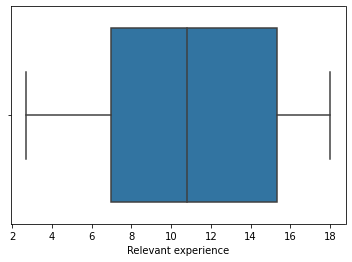


 Box Plot for variable : Expected CTC


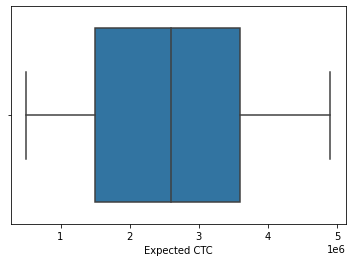


 Box Plot for variable : Percentage hike expected


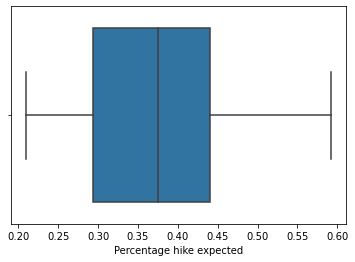


 Box Plot for variable : Number of precious jobs


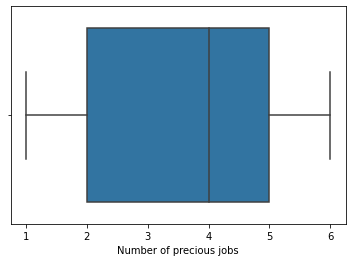


 Box Plot for variable : Interview rounds


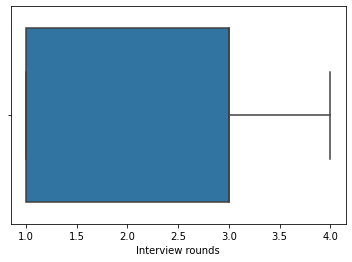


 Box Plot for variable : First interview duration


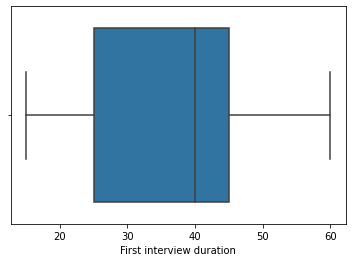


 Box Plot for variable : Last interaction duration


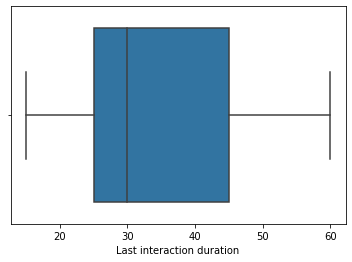


 Box Plot for variable : Time_to_join


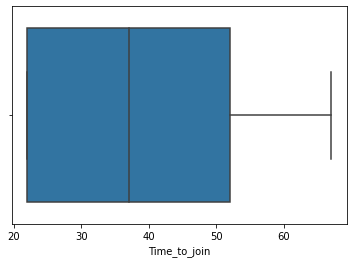

In [212]:
#Box Plot for numeric values

for i, ival in enumerate(numericcolumn):
    print("\n Box Plot for variable : "+ival)
    p = sns.boxplot(x=data[ival],data=data)
    plt.show()


### For each of the categorical variables, constructing a bar chart of the variable, with an overlay of the target variable.


Count Plot for Offered band with Target


<AxesSubplot:xlabel='count', ylabel='Offered band'>

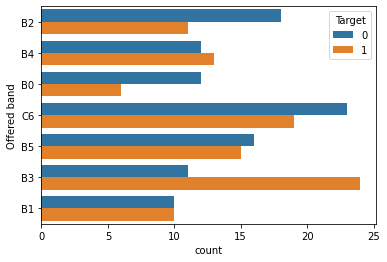


Count Plot for LOB with Target


<AxesSubplot:xlabel='count', ylabel='LOB'>

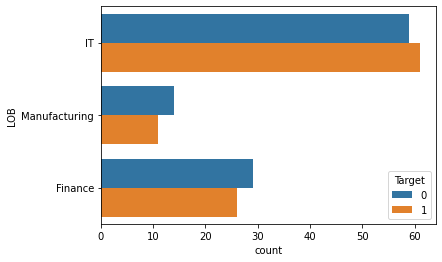


Count Plot for Joining location with Target


<AxesSubplot:xlabel='count', ylabel='Joining location'>

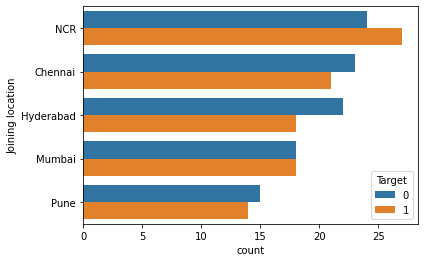


Count Plot for Candidate relocation status with Target


<AxesSubplot:xlabel='count', ylabel='Candidate relocation status'>

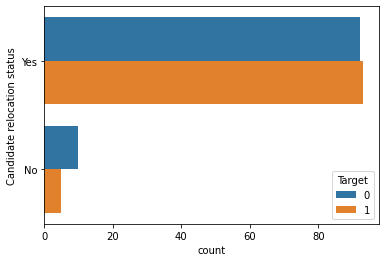


Count Plot for Current organization with Target


<AxesSubplot:xlabel='count', ylabel='Current organization'>

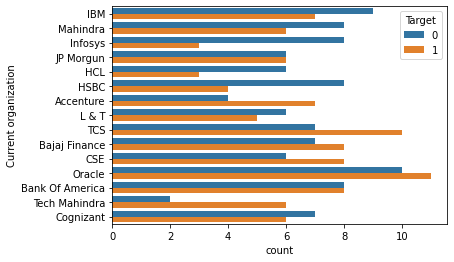


Count Plot for Highest Educational Degree with Target


<AxesSubplot:xlabel='count', ylabel='Highest Educational Degree'>

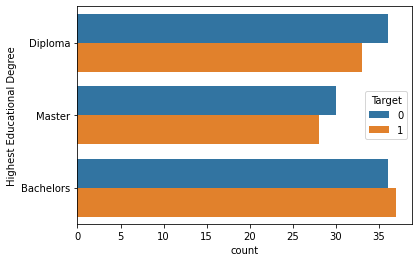


Count Plot for Gender with Target


<AxesSubplot:xlabel='count', ylabel='Gender'>

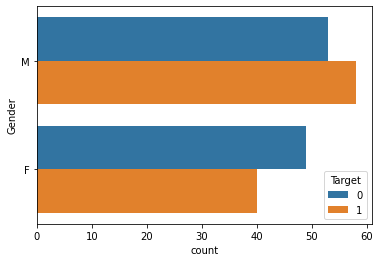


Count Plot for Candidate source with Target


<AxesSubplot:xlabel='count', ylabel='Candidate source'>

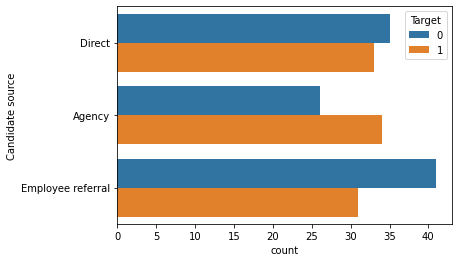


Count Plot for Location with Target


<AxesSubplot:xlabel='count', ylabel='Location'>

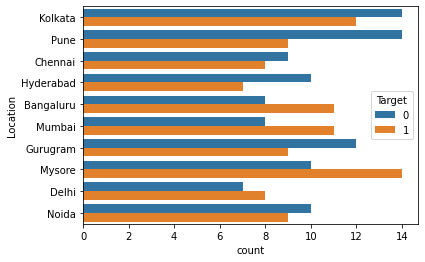


Count Plot for Interview types with Target


<AxesSubplot:xlabel='count', ylabel='Interview types'>

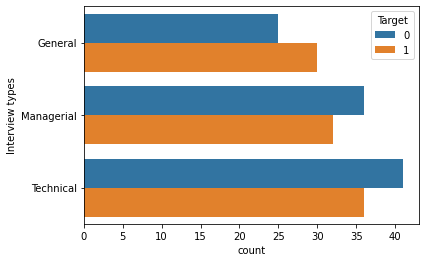


Count Plot for Interview Types2 with Target


<AxesSubplot:xlabel='count', ylabel='Interview Types2'>

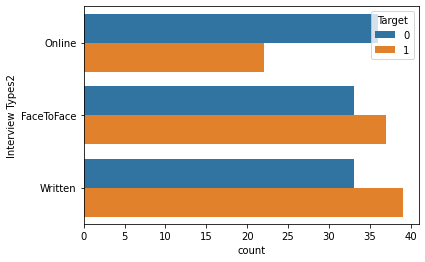

In [237]:
for i, ival in enumerate(crosscolumn):
    print("\nCount Plot for "+ival+" with Target")
    sns.countplot(y=ival, hue="Target", data=data)
    plt.show()
    

### For each of the numeric variables, constructing a dist plot of the variable, with an overlay of the target variable.


Hist Plot for Offered Salary with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

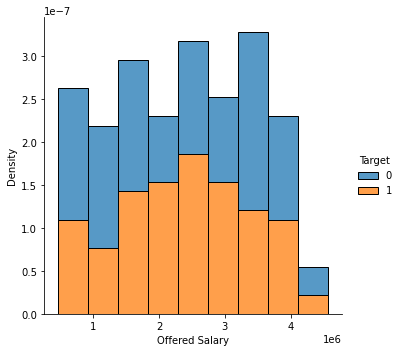


Hist Plot for Percentage hike offered with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

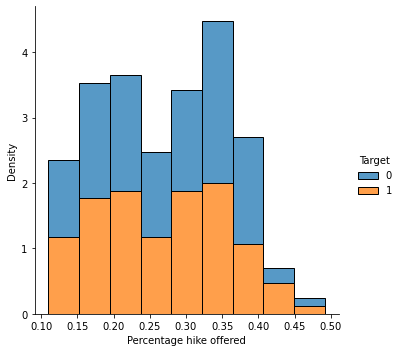


Hist Plot for Joining bonus amount with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

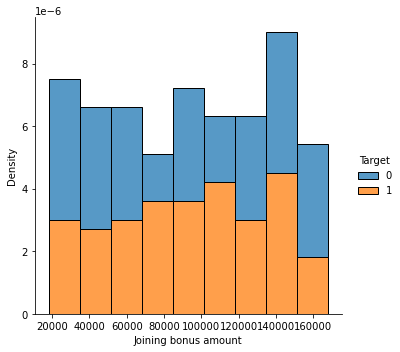


Hist Plot for Notice period with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

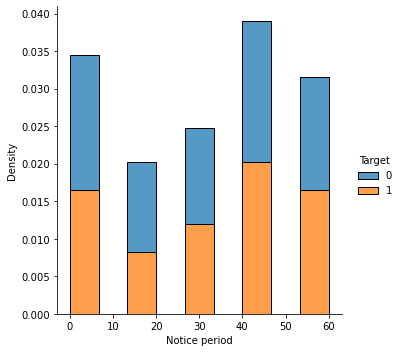


Hist Plot for Current CTC with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

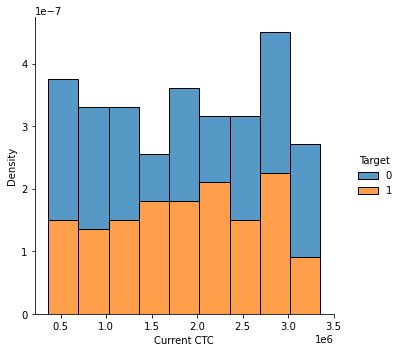


Hist Plot for Total experience with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

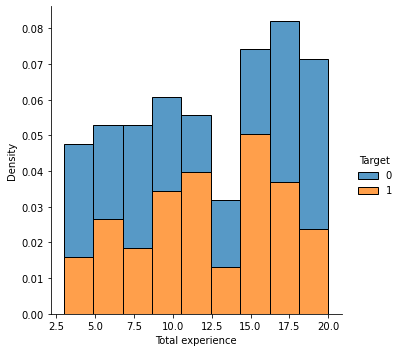


Hist Plot for Relevant experience with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

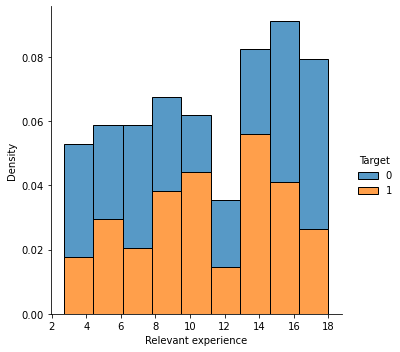


Hist Plot for Expected CTC with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

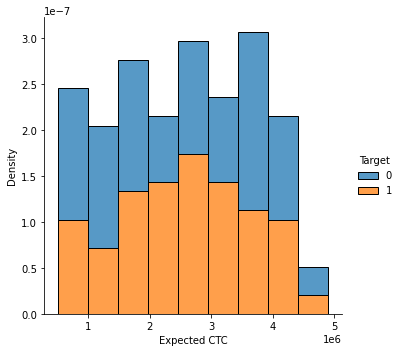


Hist Plot for Percentage hike expected with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

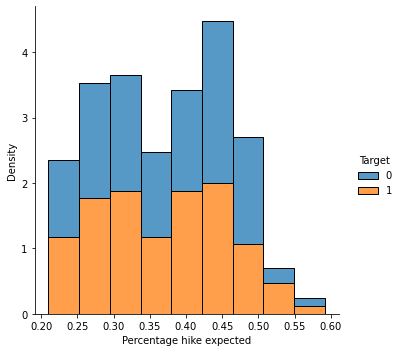


Hist Plot for Number of precious jobs with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

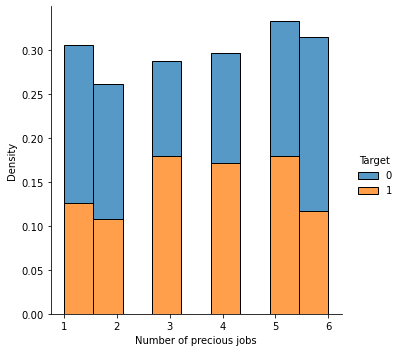


Hist Plot for Interview rounds with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

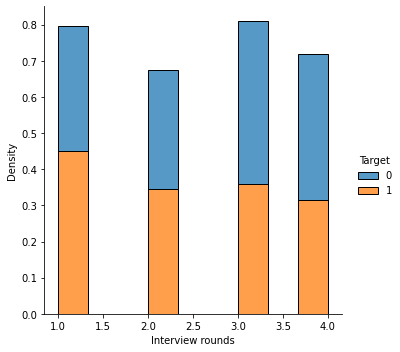


Hist Plot for First interview duration with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

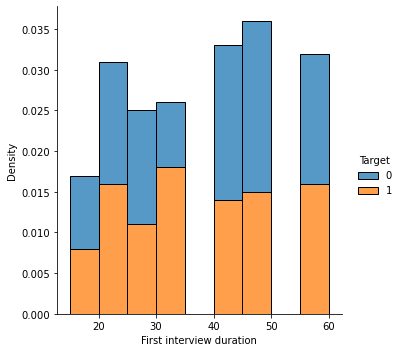


Hist Plot for Last interaction duration with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

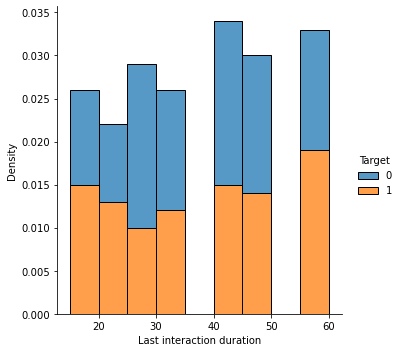


Hist Plot for Time_to_join with Target


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

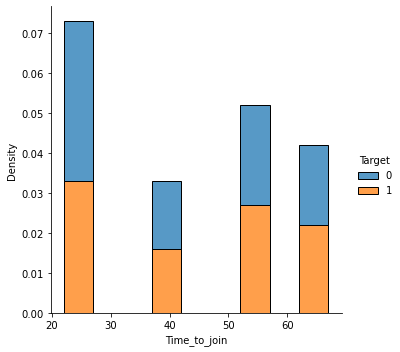

In [236]:
for i, ival in enumerate(numericcolumn):
    print("\nHist Plot for "+ival+" with Target")
    plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
    sns.displot(data, x=ival, hue='Target', multiple="stack", stat="density")
    plt.show()


### Test for Correlation

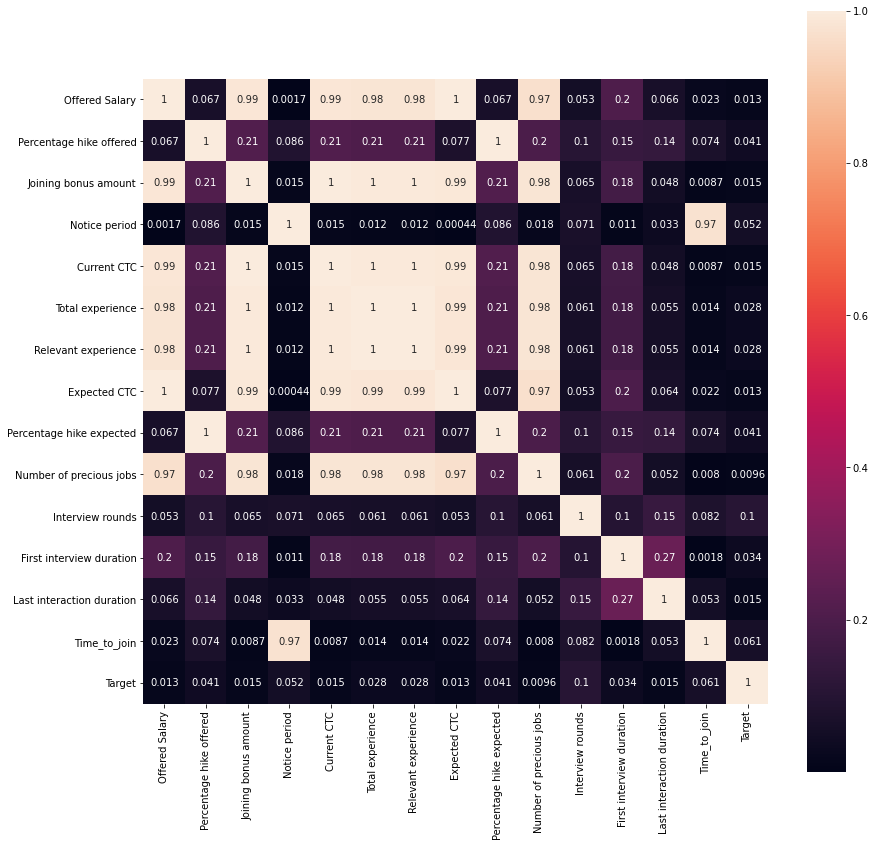

In [213]:
#heat map - normalize and recheck
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(data.corr().abs(), annot=True, fmt='.2g', square=True, ax=ax)
plt.show()

### chi-square Test

In [228]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [231]:
def compute_chi_square(column_1, column_2):
    ct1 = pd.crosstab(data[column_1], data[column_2], dropna=False)
    stat, p, dof, expected = chi2_contingency(ct1) 
  
    # interpret p-value 
    alpha = 0.05
    print("p value is " + str(p)) 
    if p <= alpha: 
        print('Dependent (reject H0)') 
        return p
    else: 
        print('Independent (H0 holds true)')
        return p, True

In [233]:
for i, ival in enumerate(crosscolumn):
    for j, jval in enumerate(crosscolumn):
        if i != j and j > i:
            print("\nChi-Square test for "+ival+" with "+jval)
            res=pd.crosstab(data[ival], data[jval])
            res
            p = compute_chi_square(ival,jval)
            print("\n")



Chi-Square test for Offered band with LOB


LOB,Finance,IT,Manufacturing
Offered band,,,
B0,3,9,6
B1,6,13,1
B2,12,16,1
B3,8,26,1
B4,6,16,3
B5,7,17,7
C6,13,23,6


p value is 0.066049547205569
Independent (H0 holds true)



Chi-Square test for Offered band with Joining location


Joining location,Chennai,Hyderabad,Mumbai,NCR,Pune
Offered band,,,,,
B0,5,3,3,4,3
B1,4,4,2,7,3
B2,6,7,6,9,1
B3,10,7,7,8,3
B4,5,5,6,3,6
B5,7,5,5,7,7
C6,7,9,7,13,6


p value is 0.9536539597082782
Independent (H0 holds true)



Chi-Square test for Offered band with Candidate relocation status


Candidate relocation status,No,Yes
Offered band,,
B0,4,14
B1,0,20
B2,2,27
B3,1,34
B4,1,24
B5,3,28
C6,4,38


p value is 0.16003834422576838
Independent (H0 holds true)



Chi-Square test for Offered band with Current organization


Current organization,Accenture,Bajaj Finance,Bank Of America,CSE,Cognizant,HCL,HSBC,IBM,Infosys,JP Morgun,L & T,Mahindra,Oracle,TCS,Tech Mahindra
Offered band,,,,,,,,,,,,,,,
B0,1,0,2,0,3,1,1,1,2,0,4,2,1,0,0
B1,0,2,3,1,3,0,0,0,1,1,0,1,4,3,1
B2,2,6,3,0,2,2,0,3,3,3,0,1,1,3,0
B3,1,2,1,3,1,1,1,5,3,4,0,1,6,4,2
B4,1,2,2,4,2,2,1,2,1,1,0,3,1,2,1
B5,2,1,2,3,1,1,4,3,1,0,3,4,3,2,1
C6,4,2,3,3,1,2,5,2,0,3,4,2,5,3,3


p value is 0.27954035703347047
Independent (H0 holds true)



Chi-Square test for Offered band with Highest Educational Degree


Highest Educational Degree,Bachelors,Diploma,Master
Offered band,,,
B0,7,7,4
B1,5,8,7
B2,13,7,9
B3,15,12,8
B4,7,11,7
B5,13,10,8
C6,13,14,15


p value is 0.8895964629416526
Independent (H0 holds true)



Chi-Square test for Offered band with Gender


Gender,F,M
Offered band,,
B0,9,9
B1,7,13
B2,11,18
B3,12,23
B4,9,16
B5,17,14
C6,24,18


p value is 0.2587337120061325
Independent (H0 holds true)



Chi-Square test for Offered band with Candidate source


Candidate source,Agency,Direct,Employee referral
Offered band,,,
B0,7,6,5
B1,7,5,8
B2,10,12,7
B3,8,13,14
B4,8,8,9
B5,10,6,15
C6,10,18,14


p value is 0.6881747478185025
Independent (H0 holds true)



Chi-Square test for Offered band with Location


Location,Bangaluru,Chennai,Delhi,Gurugram,Hyderabad,Kolkata,Mumbai,Mysore,Noida,Pune
Offered band,,,,,,,,,,
B0,4,3,2,1,2,1,3,0,0,2
B1,3,1,1,1,2,1,1,3,5,2
B2,2,3,0,6,3,2,2,5,1,5
B3,5,4,5,3,3,3,1,6,2,3
B4,0,1,1,2,1,5,3,3,4,5
B5,1,1,2,5,4,5,3,3,3,4
C6,4,4,4,3,2,9,6,4,4,2


p value is 0.4517744386106717
Independent (H0 holds true)



Chi-Square test for Offered band with Interview types


Interview types,General,Managerial,Technical
Offered band,,,
B0,5,5,8
B1,3,5,12
B2,9,14,6
B3,13,8,14
B4,3,13,9
B5,9,9,13
C6,13,14,15


p value is 0.17564136356017374
Independent (H0 holds true)



Chi-Square test for Offered band with Interview Types2


Interview Types2,FaceToFace,Online,Written
Offered band,,,
B0,5,6,7
B1,8,4,8
B2,11,9,9
B3,10,8,17
B4,9,7,9
B5,13,8,10
C6,14,16,12


p value is 0.8899882132505568
Independent (H0 holds true)



Chi-Square test for LOB with Joining location


Joining location,Chennai,Hyderabad,Mumbai,NCR,Pune
LOB,,,,,
Finance,10,12,14,11,8
IT,29,23,20,30,18
Manufacturing,5,5,2,10,3


p value is 0.5520327896076254
Independent (H0 holds true)



Chi-Square test for LOB with Candidate relocation status


Candidate relocation status,No,Yes
LOB,,
Finance,8,47
IT,6,114
Manufacturing,1,24


p value is 0.06529036986059708
Independent (H0 holds true)



Chi-Square test for LOB with Current organization


Current organization,Accenture,Bajaj Finance,Bank Of America,CSE,Cognizant,HCL,HSBC,IBM,Infosys,JP Morgun,L & T,Mahindra,Oracle,TCS,Tech Mahindra
LOB,,,,,,,,,,,,,,,
Finance,0,15,16,0,0,0,12,0,0,12,0,0,0,0,0
IT,11,0,0,14,13,9,0,16,11,0,0,0,21,17,8
Manufacturing,0,0,0,0,0,0,0,0,0,0,11,14,0,0,0


p value is 1.9464445100343697e-67
Dependent (reject H0)



Chi-Square test for LOB with Highest Educational Degree


Highest Educational Degree,Bachelors,Diploma,Master
LOB,,,
Finance,26,15,14
IT,39,43,38
Manufacturing,8,11,6


p value is 0.3183509878605492
Independent (H0 holds true)



Chi-Square test for LOB with Gender


Gender,F,M
LOB,,
Finance,22,33
IT,55,65
Manufacturing,12,13


p value is 0.718443834941506
Independent (H0 holds true)



Chi-Square test for LOB with Candidate source


Candidate source,Agency,Direct,Employee referral
LOB,,,
Finance,10,23,22
IT,39,39,42
Manufacturing,11,6,8


p value is 0.1564021739463223
Independent (H0 holds true)



Chi-Square test for LOB with Location


Location,Bangaluru,Chennai,Delhi,Gurugram,Hyderabad,Kolkata,Mumbai,Mysore,Noida,Pune
LOB,,,,,,,,,,
Finance,5,7,5,1,6,5,4,7,6,9
IT,11,9,8,17,10,16,12,15,10,12
Manufacturing,3,1,2,3,1,5,3,2,3,2


p value is 0.7642863281399703
Independent (H0 holds true)



Chi-Square test for LOB with Interview types


Interview types,General,Managerial,Technical
LOB,,,
Finance,16,20,19
IT,32,39,49
Manufacturing,7,9,9


p value is 0.9493311024027452
Independent (H0 holds true)



Chi-Square test for LOB with Interview Types2


Interview Types2,FaceToFace,Online,Written
LOB,,,
Finance,22,15,18
IT,39,36,45
Manufacturing,9,7,9


p value is 0.9158728992089747
Independent (H0 holds true)



Chi-Square test for Joining location with Candidate relocation status


Candidate relocation status,No,Yes
Joining location,,
Chennai,5,39
Hyderabad,2,38
Mumbai,3,33
NCR,0,51
Pune,5,24


p value is 0.05088854269533522
Independent (H0 holds true)



Chi-Square test for Joining location with Current organization


Current organization,Accenture,Bajaj Finance,Bank Of America,CSE,Cognizant,HCL,HSBC,IBM,Infosys,JP Morgun,L & T,Mahindra,Oracle,TCS,Tech Mahindra
Joining location,,,,,,,,,,,,,,,
Chennai,4,4,3,1,2,2,1,7,4,2,1,4,4,4,1
Hyderabad,2,4,3,4,1,3,1,3,2,4,3,2,2,3,3
Mumbai,2,3,6,3,2,3,4,2,2,1,1,1,3,2,1
NCR,2,2,2,4,4,1,2,4,2,5,3,7,6,4,3
Pune,1,2,2,2,4,0,4,0,1,0,3,0,6,4,0


p value is 0.5094543742821988
Independent (H0 holds true)



Chi-Square test for Joining location with Highest Educational Degree


Highest Educational Degree,Bachelors,Diploma,Master
Joining location,,,
Chennai,14,16,14
Hyderabad,16,15,9
Mumbai,16,10,10
NCR,18,18,15
Pune,9,10,10


p value is 0.9384597349011239
Independent (H0 holds true)



Chi-Square test for Joining location with Gender


Gender,F,M
Joining location,,
Chennai,17,27
Hyderabad,20,20
Mumbai,14,22
NCR,23,28
Pune,15,14


p value is 0.7024027787910925
Independent (H0 holds true)



Chi-Square test for Joining location with Candidate source


Candidate source,Agency,Direct,Employee referral
Joining location,,,
Chennai,18,10,16
Hyderabad,7,16,17
Mumbai,10,14,12
NCR,19,20,12
Pune,6,8,15


p value is 0.09764790206812818
Independent (H0 holds true)



Chi-Square test for Joining location with Location


Location,Bangaluru,Chennai,Delhi,Gurugram,Hyderabad,Kolkata,Mumbai,Mysore,Noida,Pune
Joining location,,,,,,,,,,
Chennai,4,5,1,3,3,8,7,7,3,3
Hyderabad,3,4,3,3,2,8,3,6,3,5
Mumbai,6,3,2,5,4,2,3,1,4,6
NCR,4,2,6,8,4,4,2,9,8,4
Pune,2,3,3,2,4,4,4,1,1,5


p value is 0.4929594275040343
Independent (H0 holds true)



Chi-Square test for Joining location with Interview types


Interview types,General,Managerial,Technical
Joining location,,,
Chennai,18,12,14
Hyderabad,10,12,18
Mumbai,5,18,13
NCR,18,13,20
Pune,4,13,12


p value is 0.056416358223049266
Independent (H0 holds true)



Chi-Square test for Joining location with Interview Types2


Interview Types2,FaceToFace,Online,Written
Joining location,,,
Chennai,14,13,17
Hyderabad,16,8,16
Mumbai,12,14,10
NCR,20,8,23
Pune,8,15,6


p value is 0.04575538969027142
Dependent (reject H0)



Chi-Square test for Candidate relocation status with Current organization


Current organization,Accenture,Bajaj Finance,Bank Of America,CSE,Cognizant,HCL,HSBC,IBM,Infosys,JP Morgun,L & T,Mahindra,Oracle,TCS,Tech Mahindra
Candidate relocation status,,,,,,,,,,,,,,,
No,0,2,3,0,2,0,2,0,3,1,1,0,0,1,0
Yes,11,13,13,14,11,9,10,16,8,11,10,14,21,16,8


p value is 0.12613064256181225
Independent (H0 holds true)



Chi-Square test for Candidate relocation status with Highest Educational Degree


Highest Educational Degree,Bachelors,Diploma,Master
Candidate relocation status,,,
No,7,4,4
Yes,66,65,54


p value is 0.677708608677271
Independent (H0 holds true)



Chi-Square test for Candidate relocation status with Gender


Gender,F,M
Candidate relocation status,,
No,3,12
Yes,86,99


p value is 0.08631872164537154
Independent (H0 holds true)



Chi-Square test for Candidate relocation status with Candidate source


Candidate source,Agency,Direct,Employee referral
Candidate relocation status,,,
No,3,8,4
Yes,57,60,68


p value is 0.2572187428383288
Independent (H0 holds true)



Chi-Square test for Candidate relocation status with Location


Location,Bangaluru,Chennai,Delhi,Gurugram,Hyderabad,Kolkata,Mumbai,Mysore,Noida,Pune
Candidate relocation status,,,,,,,,,,
No,0,5,0,0,2,0,3,0,0,5
Yes,19,12,15,21,15,26,16,24,19,18


p value is 0.00031176889796008387
Dependent (reject H0)



Chi-Square test for Candidate relocation status with Interview types


Interview types,General,Managerial,Technical
Candidate relocation status,,,
No,4,5,6
Yes,51,63,71


p value is 0.9921848084591094
Independent (H0 holds true)



Chi-Square test for Candidate relocation status with Interview Types2


Interview Types2,FaceToFace,Online,Written
Candidate relocation status,,,
No,4,8,3
Yes,66,50,69


p value is 0.09136116268641703
Independent (H0 holds true)



Chi-Square test for Current organization with Highest Educational Degree


Highest Educational Degree,Bachelors,Diploma,Master
Current organization,,,
Accenture,4,2,5
Bajaj Finance,6,5,4
Bank Of America,5,3,8
CSE,6,4,4
Cognizant,6,5,2
HCL,1,3,5
HSBC,7,3,2
IBM,2,11,3
Infosys,2,4,5


p value is 0.19433280186444465
Independent (H0 holds true)



Chi-Square test for Current organization with Gender


Gender,F,M
Current organization,,
Accenture,8,3
Bajaj Finance,4,11
Bank Of America,6,10
CSE,5,9
Cognizant,5,8
HCL,5,4
HSBC,8,4
IBM,9,7
Infosys,5,6


p value is 0.16651671572435475
Independent (H0 holds true)



Chi-Square test for Current organization with Candidate source


Candidate source,Agency,Direct,Employee referral
Current organization,,,
Accenture,3,4,4
Bajaj Finance,3,6,6
Bank Of America,2,7,7
CSE,5,5,4
Cognizant,4,4,5
HCL,5,2,2
HSBC,2,5,5
IBM,4,4,8
Infosys,4,3,4


p value is 0.9776677931765022
Independent (H0 holds true)



Chi-Square test for Current organization with Location


Location,Bangaluru,Chennai,Delhi,Gurugram,Hyderabad,Kolkata,Mumbai,Mysore,Noida,Pune
Current organization,,,,,,,,,,
Accenture,1,1,0,1,0,2,2,2,1,1
Bajaj Finance,2,2,2,0,0,2,1,3,0,3
Bank Of America,0,2,2,1,1,1,1,3,2,3
CSE,0,1,1,0,1,1,1,3,3,3
Cognizant,2,1,1,2,3,1,0,1,1,1
HCL,1,0,1,3,1,1,1,0,0,1
HSBC,1,2,0,0,2,2,2,0,2,1
IBM,2,1,0,2,1,5,1,2,1,1
Infosys,2,2,0,1,0,0,2,2,0,2


p value is 0.9763934153697091
Independent (H0 holds true)



Chi-Square test for Current organization with Interview types


Interview types,General,Managerial,Technical
Current organization,,,
Accenture,3,4,4
Bajaj Finance,3,7,5
Bank Of America,9,2,5
CSE,5,6,3
Cognizant,2,7,4
HCL,1,4,4
HSBC,3,4,5
IBM,6,4,6
Infosys,2,2,7


p value is 0.5705108141565987
Independent (H0 holds true)



Chi-Square test for Current organization with Interview Types2


Interview Types2,FaceToFace,Online,Written
Current organization,,,
Accenture,6,0,5
Bajaj Finance,7,3,5
Bank Of America,6,5,5
CSE,2,5,7
Cognizant,7,3,3
HCL,1,5,3
HSBC,6,5,1
IBM,6,5,5
Infosys,4,3,4


p value is 0.6481284713249291
Independent (H0 holds true)



Chi-Square test for Highest Educational Degree with Gender


Gender,F,M
Highest Educational Degree,,
Bachelors,27,46
Diploma,39,30
Master,23,35


p value is 0.04377042072273636
Dependent (reject H0)



Chi-Square test for Highest Educational Degree with Candidate source


Candidate source,Agency,Direct,Employee referral
Highest Educational Degree,,,
Bachelors,26,27,20
Diploma,18,19,32
Master,16,22,20


p value is 0.1891481378851138
Independent (H0 holds true)



Chi-Square test for Highest Educational Degree with Location


Location,Bangaluru,Chennai,Delhi,Gurugram,Hyderabad,Kolkata,Mumbai,Mysore,Noida,Pune
Highest Educational Degree,,,,,,,,,,
Bachelors,5,6,4,7,8,10,9,5,8,11
Diploma,12,5,4,4,7,11,5,8,5,8
Master,2,6,7,10,2,5,5,11,6,4


p value is 0.11841522644052895
Independent (H0 holds true)



Chi-Square test for Highest Educational Degree with Interview types


Interview types,General,Managerial,Technical
Highest Educational Degree,,,
Bachelors,22,28,23
Diploma,11,24,34
Master,22,16,20


p value is 0.03712598131922368
Dependent (reject H0)



Chi-Square test for Highest Educational Degree with Interview Types2


Interview Types2,FaceToFace,Online,Written
Highest Educational Degree,,,
Bachelors,25,22,26
Diploma,27,20,22
Master,18,16,24


p value is 0.8310285841653078
Independent (H0 holds true)



Chi-Square test for Gender with Candidate source


Candidate source,Agency,Direct,Employee referral
Gender,,,
F,29,30,30
M,31,38,42


p value is 0.7426565567107231
Independent (H0 holds true)



Chi-Square test for Gender with Location


Location,Bangaluru,Chennai,Delhi,Gurugram,Hyderabad,Kolkata,Mumbai,Mysore,Noida,Pune
Gender,,,,,,,,,,
F,13,4,7,9,7,11,9,8,8,13
M,6,13,8,12,10,15,10,16,11,10


p value is 0.32889658783032744
Independent (H0 holds true)



Chi-Square test for Gender with Interview types


Interview types,General,Managerial,Technical
Gender,,,
F,22,27,40
M,33,41,37


p value is 0.24496538770224516
Independent (H0 holds true)



Chi-Square test for Gender with Interview Types2


Interview Types2,FaceToFace,Online,Written
Gender,,,
F,35,24,30
M,35,34,42


p value is 0.5168225783315297
Independent (H0 holds true)



Chi-Square test for Candidate source with Location


Location,Bangaluru,Chennai,Delhi,Gurugram,Hyderabad,Kolkata,Mumbai,Mysore,Noida,Pune
Candidate source,,,,,,,,,,
Agency,7,5,3,11,3,6,3,6,8,8
Direct,5,6,8,3,5,11,9,8,5,8
Employee referral,7,6,4,7,9,9,7,10,6,7


p value is 0.5353280075034077
Independent (H0 holds true)



Chi-Square test for Candidate source with Interview types


Interview types,General,Managerial,Technical
Candidate source,,,
Agency,19,21,20
Direct,20,16,32
Employee referral,16,31,25


p value is 0.12957757284248372
Independent (H0 holds true)



Chi-Square test for Candidate source with Interview Types2


Interview Types2,FaceToFace,Online,Written
Candidate source,,,
Agency,20,16,24
Direct,25,20,23
Employee referral,25,22,25


p value is 0.9543511239942235
Independent (H0 holds true)



Chi-Square test for Location with Interview types


Interview types,General,Managerial,Technical
Location,,,
Bangaluru,3,9,7
Chennai,5,5,7
Delhi,5,3,7
Gurugram,8,7,6
Hyderabad,3,7,7
Kolkata,5,9,12
Mumbai,6,7,6
Mysore,9,6,9
Noida,6,5,8


p value is 0.9290800149932914
Independent (H0 holds true)



Chi-Square test for Location with Interview Types2


Interview Types2,FaceToFace,Online,Written
Location,,,
Bangaluru,7,5,7
Chennai,6,7,4
Delhi,3,3,9
Gurugram,8,10,3
Hyderabad,5,5,7
Kolkata,12,5,9
Mumbai,4,8,7
Mysore,10,4,10
Noida,5,2,12


p value is 0.08190835274468274
Independent (H0 holds true)



Chi-Square test for Interview types with Interview Types2


Interview Types2,FaceToFace,Online,Written
Interview types,,,
General,17,13,25
Managerial,24,25,19
Technical,29,20,28


p value is 0.26562613754331715
Independent (H0 holds true)




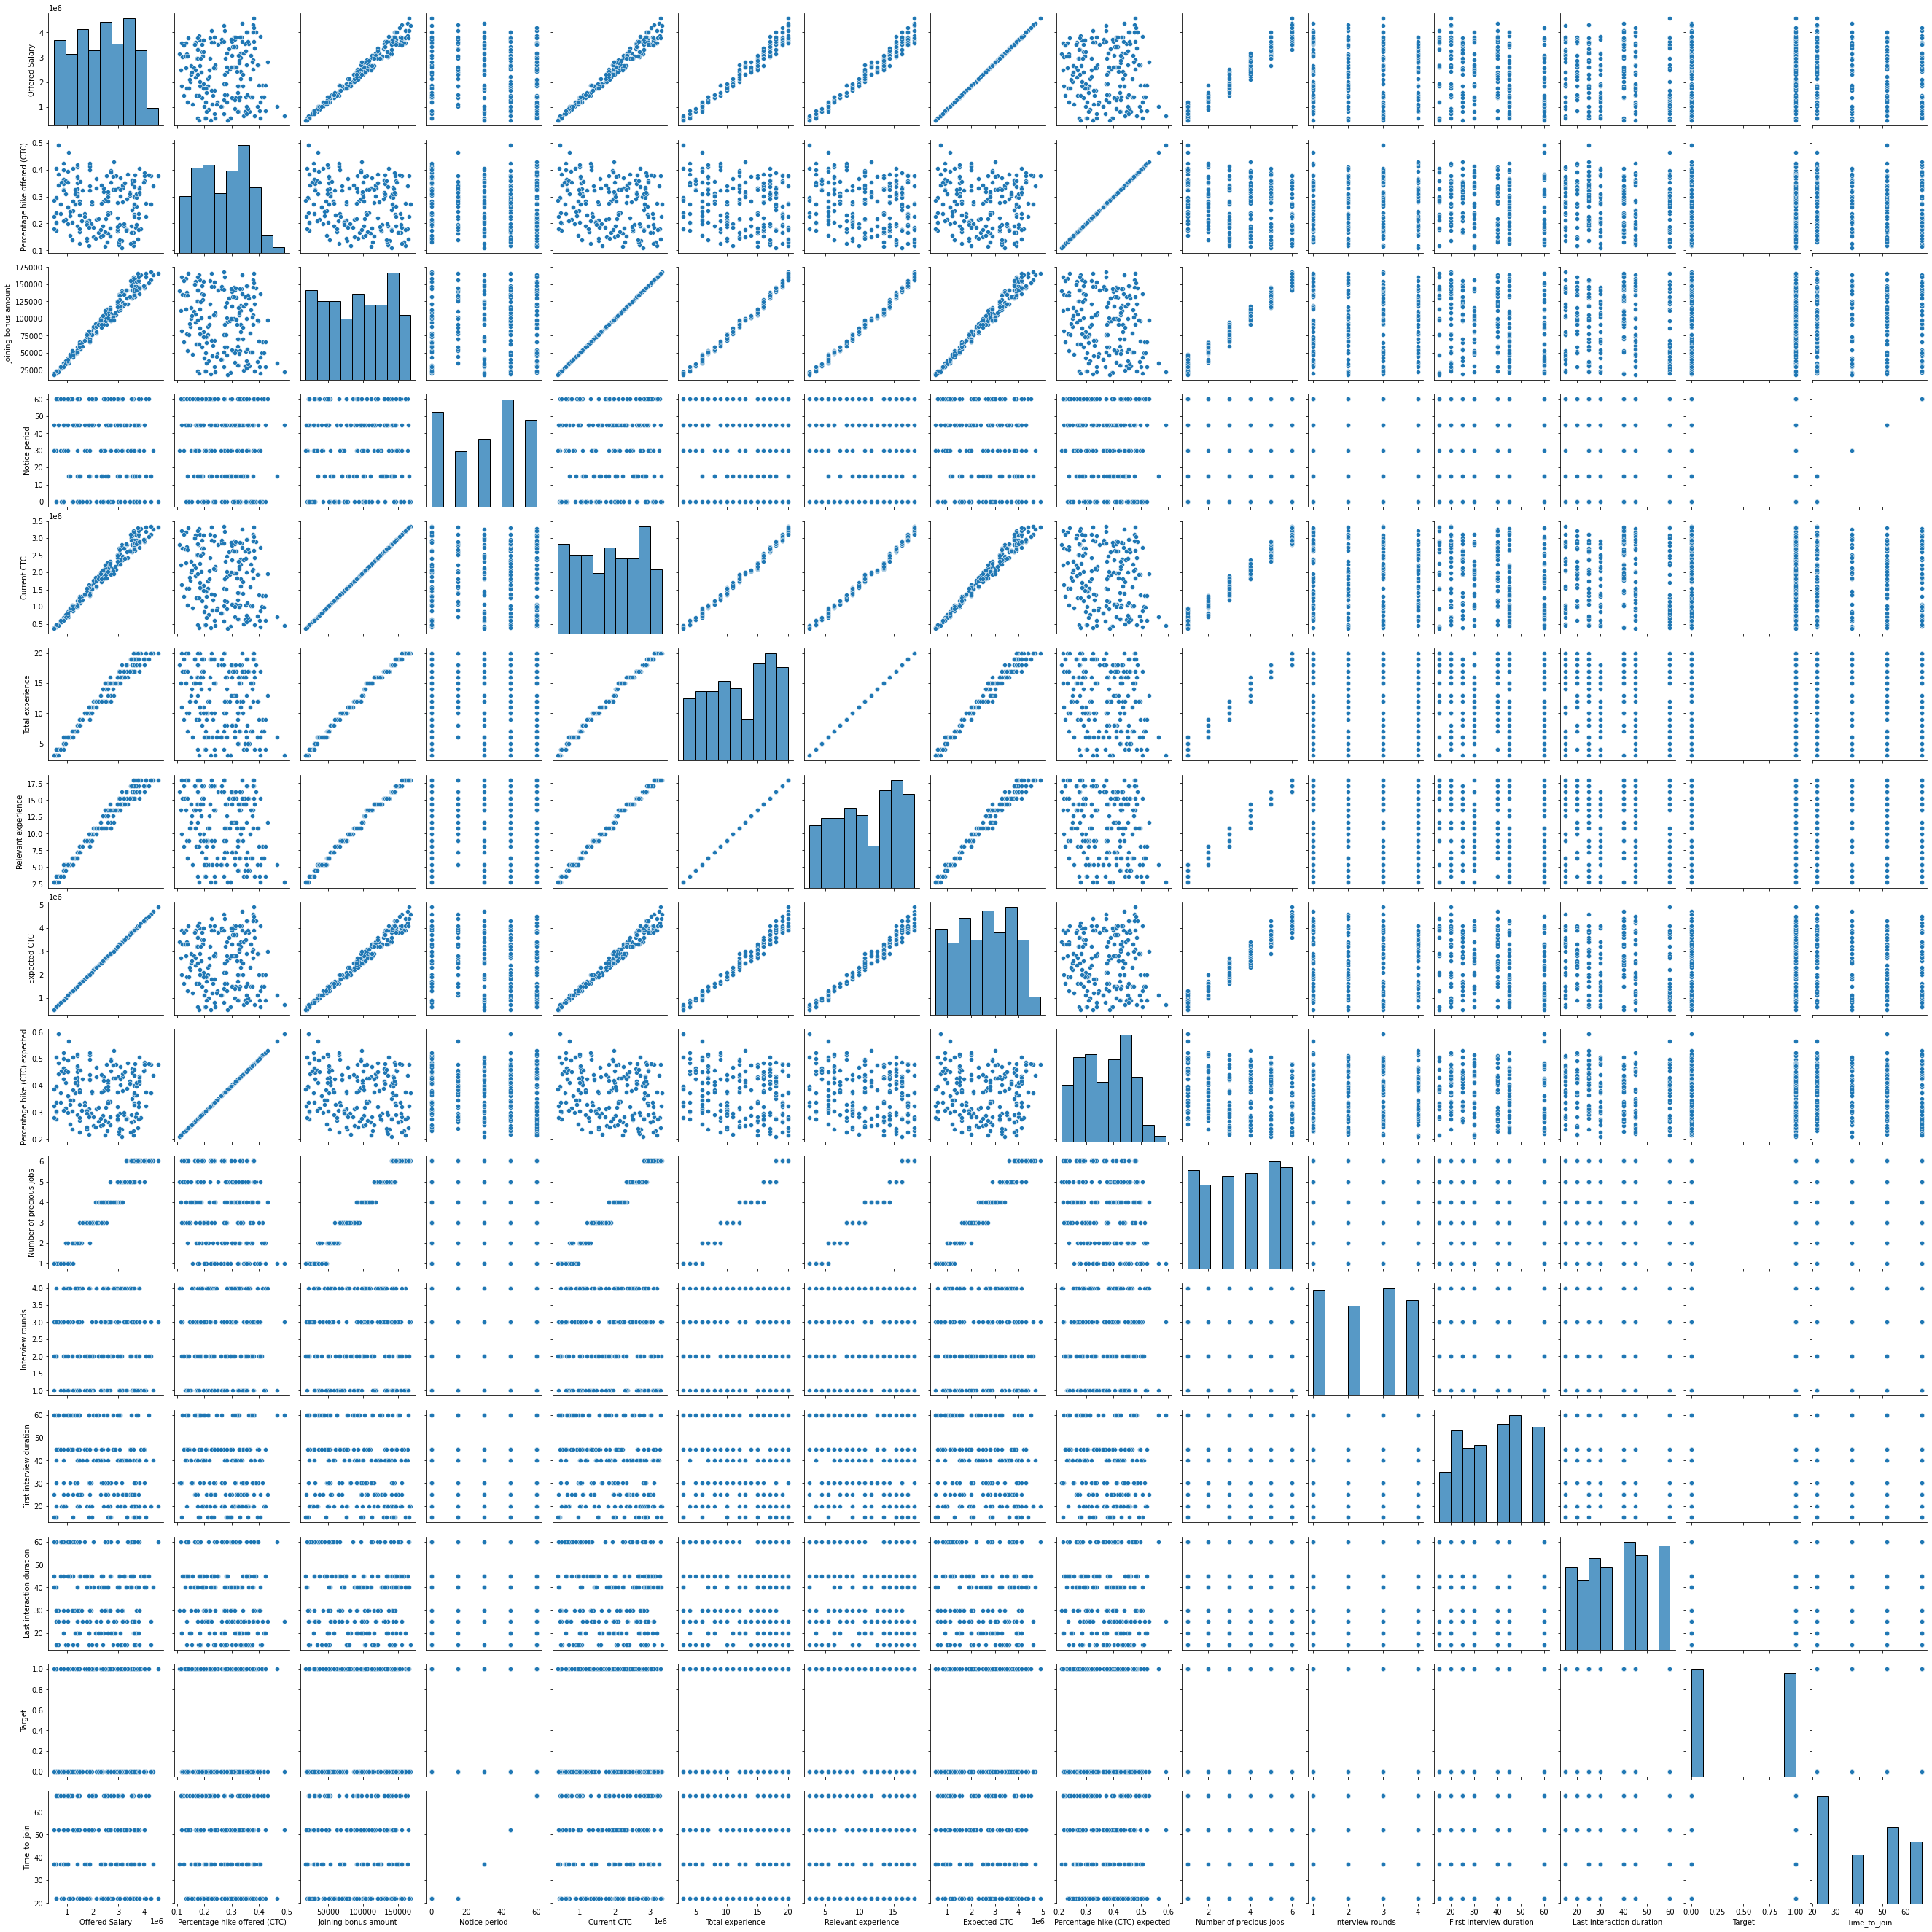

In [161]:
sns.pairplot(data)

Hist Plot for Offered Salary with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Offered Salary', ylabel='Count'>

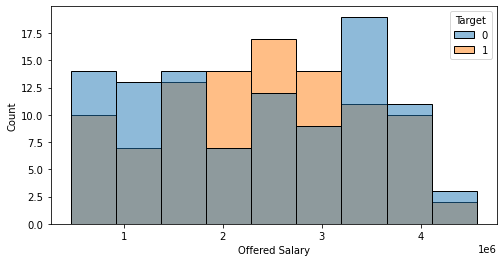

Hist Plot for Percentage hike offered (CTC) with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Percentage hike offered (CTC)', ylabel='Count'>

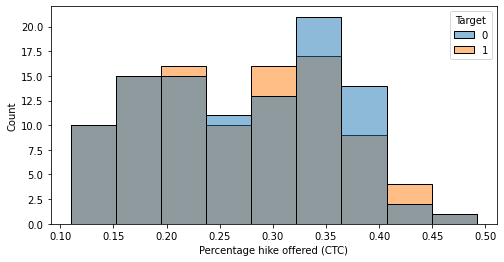

Hist Plot for Joining bonus amount with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Joining bonus amount', ylabel='Count'>

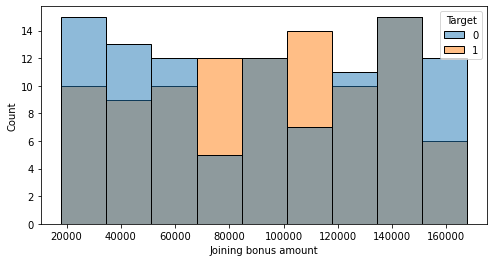

Hist Plot for Notice period with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Notice period', ylabel='Count'>

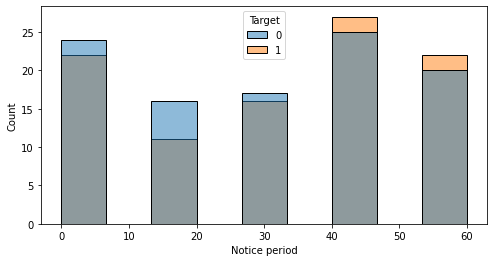

Hist Plot for Current CTC with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Current CTC', ylabel='Count'>

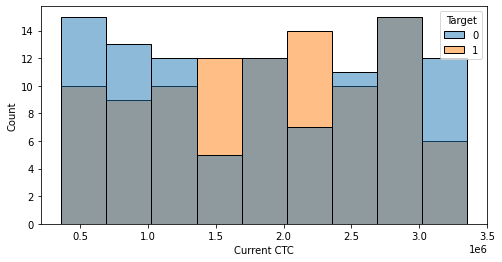

Hist Plot for Total experience with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Total experience', ylabel='Count'>

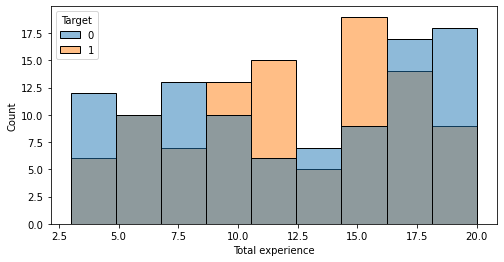

Hist Plot for Relevant experience with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Relevant experience', ylabel='Count'>

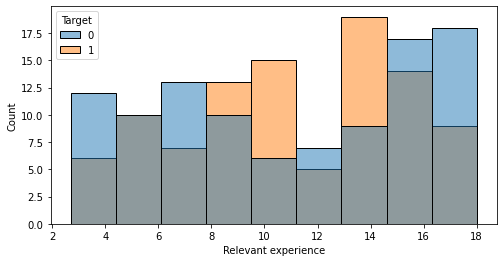

Hist Plot for Expected CTC with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Expected CTC', ylabel='Count'>

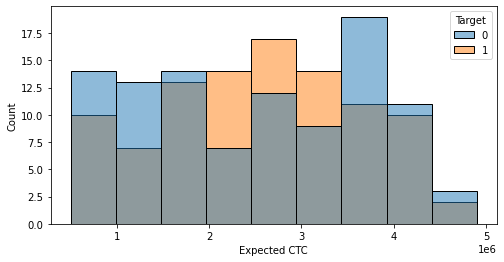

Hist Plot for Number of precious jobs with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Number of precious jobs', ylabel='Count'>

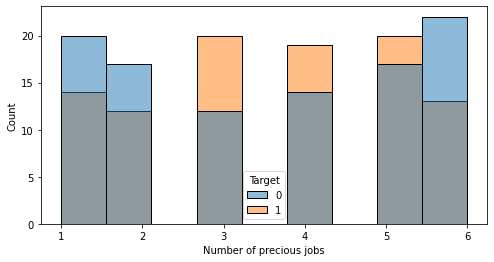

Hist Plot for Interview rounds with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Interview rounds', ylabel='Count'>

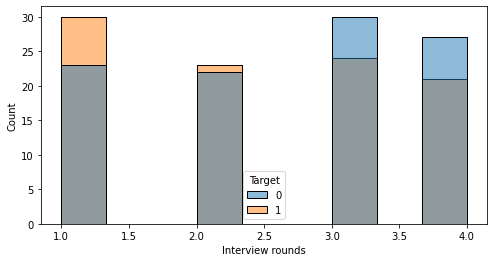

Hist Plot for First interview duration with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='First interview duration', ylabel='Count'>

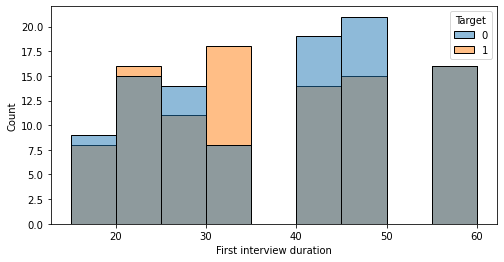

Hist Plot for Last interaction duration with  



<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Last interaction duration', ylabel='Count'>

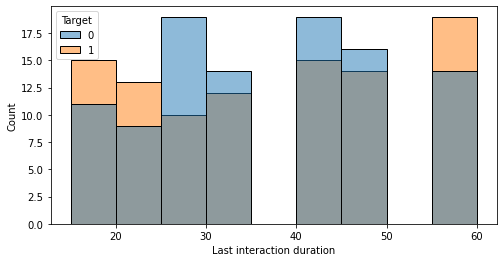

In [70]:
#histogram for numerical fields

for i, ival in enumerate(numericcolumn):
    print("Hist Plot for "+ival+" with Target  \n")
    plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
    sns.histplot(data=data, x=ival, hue="Target")
    plt.show()


Box Plot for Offered band with  



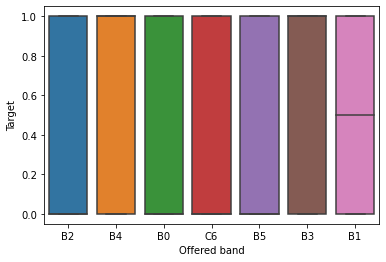

Box Plot for LOB with  



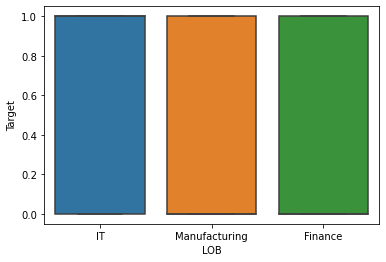

Box Plot for Joining location with  



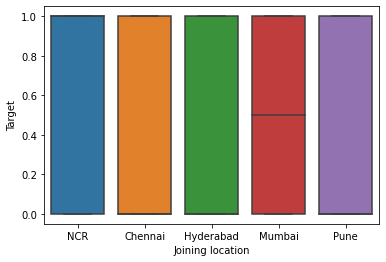

Box Plot for Candidate relocation status with  



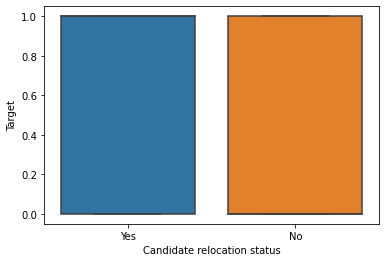

Box Plot for Current organization with  



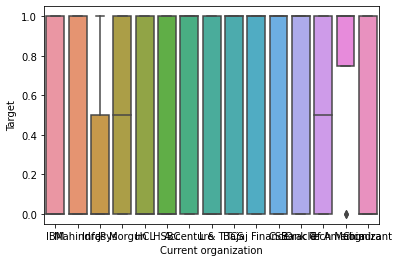

Box Plot for Highest Educational Degree with  



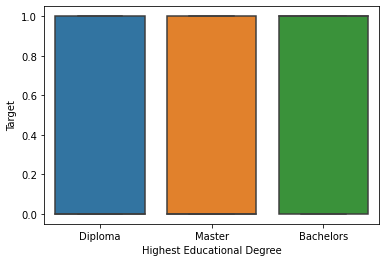

Box Plot for Gender with  



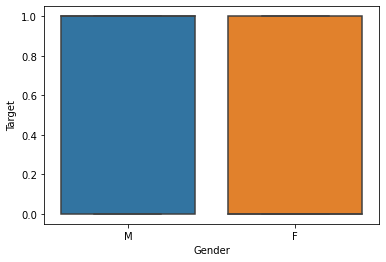

Box Plot for Candidate source with  



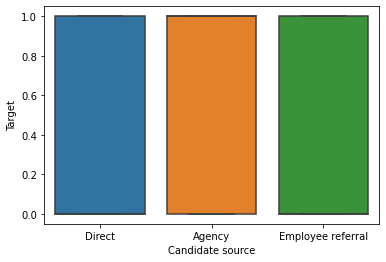

Box Plot for Location with  



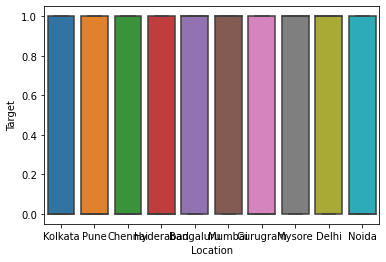

Box Plot for Interview types with  



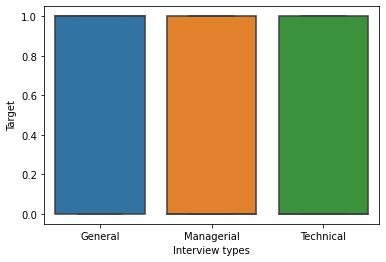

Box Plot for Interview Types2 with  



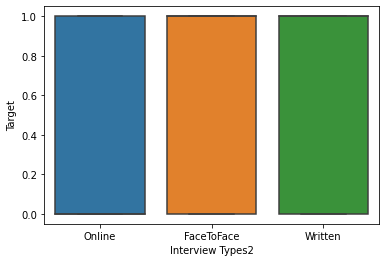

In [68]:
#Box Plot for categorical values

for i, ival in enumerate(crosscolumn):
    print("Box Plot for "+ival+" with  \n")
    p = sns.boxplot(x=data[ival],y=data["Target"],data=data)
    plt.show()
    
    
    sns.catplot(x="day", y="total_bill", kind="box", data=tips)